# **Import independence**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
# import kagglehub
# import os

# **Read the data**

In [ ]:
Survey_df = pd.read_excel('/content/JME_Country_Estimates_April_2021.xlsx',sheet_name = 'Survey Estimates')
print(Survey_df)

    ISO code Country and areas Survey year  Year* United Nations Region  \
0        AFG       AFGHANISTAN        1997   1997                  Asia   
1        AFG       AFGHANISTAN        2004   2004                  Asia   
2        AFG       AFGHANISTAN        2013   2013                  Asia   
3        AFG       AFGHANISTAN        2018   2018                  Asia   
4        AGO            ANGOLA        1996   1996                Africa   
..       ...               ...         ...    ...                   ...   
992      ZWE          ZIMBABWE        2009   2009                Africa   
993      ZWE          ZIMBABWE     2010-11   2010                Africa   
994      ZWE          ZIMBABWE        2014   2014                Africa   
995      ZWE          ZIMBABWE        2015   2015                Africa   
996      ZWE          ZIMBABWE        2019   2019                Africa   

    United Nations Sub-Region                      SDG Region UNICEF Region  \
0               Sout

**- Convert it in to csv file**

In [ ]:
Survey_df.to_csv('/content/JME_Country_Estimates_April_2021.csv', index=False)

In [ ]:
Survey_df

,ISO code,Country and areas,Survey year,Year*,United Nations Region,United Nations Sub-Region,SDG Region,UNICEF Region,UNICEF Sub-Region,WHO Region,...,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,Fieldwork Period,U5 Population ('000s)
0,AFG,AFGHANISTAN,1997,1997,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,...,18.2,6.5,53.2,44.9,cw 10,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,"January,1997-May,1997",3838.876953
1,AFG,AFGHANISTAN,2004,2004,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,...,8.6,4.6,59.3,32.9,w 11,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,"May,2004-June,2004",4789.353027
2,AFG,AFGHANISTAN,2013,2013,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,...,9.5,5.3,40.4,24.6,rs,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013,NNS,"May,2013-October,2013",5444.572754
3,AFG,AFGHANISTAN,2018,2018,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,...,5.1,4.1,38.2,19.1,rs,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,"March,2018-November,2018",5601.442871
4,AGO,ANGOLA,1996,1996,Africa,Middle Africa,Sub-Saharan Africa,SSA,ESA,AFRO,...,7.7,1.7,61.1,36.2,rs,Instituto Nacional de Estatistica - Gabinete d...,Inquerito de indicadores multiplos (MICS) 1996...,MICS,"August,1996-December,1996",2749.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,ZWE,ZIMBABWE,2009,2009,Africa,Eastern Africa,Sub-Saharan Africa,SSA,ESA,AFRO,...,2.4,3.5,35.1,11.7,s,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe multiple indicator monitoring survey ...,MICS,"April,2009-May,2009",1938.279053
993,ZWE,ZIMBABWE,2010-11,2010,Africa,Eastern Africa,Sub-Saharan Africa,SSA,ESA,AFRO,...,3.2,5.8,32.2,10.2,NaN,Zimbabwe National Statistics Agency (ZIMSTAT) ...,Zimbabwe demographic and health survey 2010-11...,DHS,"September,2010-March,2011",1997.281006
994,ZWE,ZIMBABWE,2014,2014,Africa,Eastern Africa,Sub-Saharan Africa,SSA,ESA,AFRO,...,3.2,3.6,27.6,11.2,s,Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe Multiple Indicator Cluster Survey 201...,MICS,"February,2014-April,2014",2236.182129
995,ZWE,ZIMBABWE,2015,2015,Africa,Eastern Africa,Sub-Saharan Africa,SSA,ESA,AFRO,...,3.3,5.6,27.1,8.5,NaN,Zimbabwe National Statistics Agency; ICF Inter...,Zimbabwe Demographic and Health Survey 2015: F...,DHS,"July,2015-December,2015",2258.788086


# **1.Data Preprocessing**

**-Get the description of the data**

In [ ]:
Survey_df.describe

<bound method NDFrame.describe of     ISO code Country and areas Survey year  Year* United Nations Region  \
0        AFG       AFGHANISTAN        1997   1997                  Asia   
1        AFG       AFGHANISTAN        2004   2004                  Asia   
2        AFG       AFGHANISTAN        2013   2013                  Asia   
3        AFG       AFGHANISTAN        2018   2018                  Asia   
4        AGO            ANGOLA        1996   1996                Africa   
..       ...               ...         ...    ...                   ...   
992      ZWE          ZIMBABWE        2009   2009                Africa   
993      ZWE          ZIMBABWE     2010-11   2010                Africa   
994      ZWE          ZIMBABWE        2014   2014                Africa   
995      ZWE          ZIMBABWE        2015   2015                Africa   
996      ZWE          ZIMBABWE        2019   2019                Africa   

    United Nations Sub-Region                      SDG Region UNICEF Region  \
0               Southern Asia  Central Asia and Southern Asia            SA   
1               Southern Asia  Central Asia and Southern Asia            SA   
2               Southern Asia  Central Asia and Southern Asia            SA   
3               Southern Asia  Central Asia and Southern Asia            SA   
4               Middle Africa              Sub-Saharan Africa           SSA   
..                        ...                             ...           ...   
992            Eastern Africa              Sub-Saharan Africa           SSA   
993            Eastern Africa              Sub-Saharan Africa           SSA   
994            Eastern Africa              Sub-Saharan Africa           SSA   
995            Eastern Africa              Sub-Saharan Africa           SSA   
996            Eastern Africa              Sub-Saharan Africa           SSA   

    UNICEF Sub-Region WHO Region  ... Wasting Overweight Stunting Underweight  \
0                  SA       EMRO  ...    18.2        6.5     53.2        44.9   
1                  SA       EMRO  ...     8.6        4.6     59.3        32.9   
2                  SA       EMRO  ...     9.5        5.3     40.4        24.6   
3                  SA       EMRO  ...     5.1        4.1     38.2        19.1   
4                 ESA       AFRO  ...     7.7        1.7     61.1        36.2   
..                ...        ...  ...     ...        ...      ...         ...   
992               ESA       AFRO  ...     2.4        3.5     35.1        11.7   
993               ESA       AFRO  ...     3.2        5.8     32.2        10.2   
994               ESA       AFRO  ...     3.2        3.6     27.6        11.2   
995               ESA       AFRO  ...     3.3        5.6     27.1         8.5   
996               ESA       AFRO  ...     2.9        2.5     23.5         9.7   

     Notes                                      Report Author  \
0    cw 10                                 CIET International   
1     w 11  Ministry of Public Health (Afghanistan), UNICE...   
2       rs  Ministry of Public Health, UNICEF and the Aga ...   
3       rs                       KIT Royal Tropical Institute   
4       rs  Instituto Nacional de Estatistica - Gabinete d...   
..     ...                                                ...   
992      s     Zimbabwe National Statistics Agency (ZIMSTAT).   
993    NaN  Zimbabwe National Statistics Agency (ZIMSTAT) ...   
994      s     Zimbabwe National Statistics Agency (ZIMSTAT).   
995    NaN  Zimbabwe National Statistics Agency; ICF Inter...   
996    NaN  Zimbabwe National Statistics Agency (ZIMSTAT) ...   

                                                Source  Short Source  \
0    Afghanistan 1997 multiple indicator baseline (...          MICS   
1    Summary report of the national nutrition surve...           NNS   
2           Afghanistan National Nutrition Survey 2013           NNS   
3                       Afghanistan Health Survey 2018         Other   
4 

**-Get the sum of nulls**

In [ ]:
Survey_df.isnull().sum()

,0
ISO code,0
Country and areas,0
Survey year,0
Year*,0
United Nations Region,0
United Nations Sub-Region,0
SDG Region,0
UNICEF Region,12
UNICEF Sub-Region,12
WHO Region,7


**-Get data type of each col**

In [ ]:
Survey_df.dtypes

,0
ISO code,object
Country and areas,object
Survey year,object
Year*,int64
United Nations Region,object
United Nations Sub-Region,object
SDG Region,object
UNICEF Region,object
UNICEF Sub-Region,object
WHO Region,object


**-Get the Duplicated data**

In [ ]:
print("Number of duplicate rows:", Survey_df.duplicated().sum())

Number of duplicate rows: 0


**-Drop the col due to nulls**

In [ ]:
droped_col = ["LDC","LLDC or SIDS","LIFD"]
Survey_df = Survey_df.drop(columns=droped_col)
Survey_df.head()

,ISO code,Country and areas,Survey year,Year*,United Nations Region,United Nations Sub-Region,SDG Region,UNICEF Region,UNICEF Sub-Region,WHO Region,...,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,Fieldwork Period,U5 Population ('000s)
0,AFG,AFGHANISTAN,1997,1997,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,...,18.2,6.5,53.2,44.9,cw 10,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,"January,1997-May,1997",3838.876953
1,AFG,AFGHANISTAN,2004,2004,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,...,8.6,4.6,59.3,32.9,w 11,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,"May,2004-June,2004",4789.353027
2,AFG,AFGHANISTAN,2013,2013,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,...,9.5,5.3,40.4,24.6,rs,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013,NNS,"May,2013-October,2013",5444.572754
3,AFG,AFGHANISTAN,2018,2018,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,...,5.1,4.1,38.2,19.1,rs,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,"March,2018-November,2018",5601.442871
4,AGO,ANGOLA,1996,1996,Africa,Middle Africa,Sub-Saharan Africa,SSA,ESA,AFRO,...,7.7,1.7,61.1,36.2,rs,Instituto Nacional de Estatistica - Gabinete d...,Inquerito de indicadores multiplos (MICS) 1996...,MICS,"August,1996-December,1996",2749.750000


**-Drop non informative col in the data**

In [ ]:
inform_col = ["Report Author","ISO code","UNICEF Survey ID","Notes"]
Survey_df = Survey_df.drop(columns=inform_col)
Survey_df.head()

,Country and areas,Survey year,Year*,United Nations Region,United Nations Sub-Region,SDG Region,UNICEF Region,UNICEF Sub-Region,WHO Region,World Bank Income Classification,...,WHZ Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Source,Short Source,Fieldwork Period,U5 Population ('000s)
0,AFGHANISTAN,1997,1997,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,Low Income,...,4846.0,NaN,18.2,6.5,53.2,44.9,Afghanistan 1997 multiple indicator baseline (...,MICS,"January,1997-May,1997",3838.876953
1,AFGHANISTAN,2004,2004,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,Low Income,...,946.0,3.5,8.6,4.6,59.3,32.9,Summary report of the national nutrition surve...,NNS,"May,2004-June,2004",4789.353027
2,AFGHANISTAN,2013,2013,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,Low Income,...,4426469.0,4.0,9.5,5.3,40.4,24.6,Afghanistan National Nutrition Survey 2013,NNS,"May,2013-October,2013",5444.572754
3,AFGHANISTAN,2018,2018,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,Low Income,...,19539.2,1.6,5.1,4.1,38.2,19.1,Afghanistan Health Survey 2018,Other,"March,2018-November,2018",5601.442871
4,ANGOLA,1996,1996,Africa,Middle Africa,Sub-Saharan Africa,SSA,ESA,AFRO,Lower Middle Income,...,1533.8,1.8,7.7,1.7,61.1,36.2,Inquerito de indicadores multiplos (MICS) 1996...,MICS,"August,1996-December,1996",2749.750000


**-Encoding stage**


In [ ]:
catigorical_Col = Survey_df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in catigorical_Col:
    if col in Survey_df.columns:
        Survey_df[col] = le.fit_transform(Survey_df[col].astype(str))

In [ ]:
Survey_df.head()

,Country and areas,Survey year,Year*,United Nations Region,United Nations Sub-Region,SDG Region,UNICEF Region,UNICEF Sub-Region,WHO Region,World Bank Income Classification,...,WHZ Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Source,Short Source,Fieldwork Period,U5 Population ('000s)
0,0,32,1997,1,17,1,4,5,2,1,...,4846.0,NaN,18.2,6.5,53.2,44.9,34,9,216,3838.876953
1,0,49,2004,1,17,1,4,5,2,1,...,946.0,3.5,8.6,4.6,59.3,32.9,849,13,492,4789.353027
2,0,70,2013,1,17,1,4,5,2,1,...,4426469.0,4.0,9.5,5.3,40.4,24.6,36,13,519,5444.572754
3,0,83,2018,1,17,1,4,5,2,1,...,19539.2,1.6,5.1,4.1,38.2,19.1,35,14,458,5601.442871
4,3,29,1996,0,9,6,5,2,0,2,...,1533.8,1.8,7.7,1.7,61.1,36.2,418,9,53,2749.750000


In [ ]:
Survey_df.columns

Index(['Country and areas', 'Survey year', 'Year*', 'United Nations Region',
       'United Nations Sub-Region', 'SDG Region', 'UNICEF Region',
       'UNICEF Sub-Region', 'WHO Region', 'World Bank Income Classification',
       'World Bank Region', 'WHO Global Database Number',
       'WHZ Survey Sample (N)', 'Severe Wasting', 'Wasting', 'Overweight',
       'Stunting', 'Underweight', 'Source', 'Short Source', 'Fieldwork Period',
       'U5 Population ('000s)'],
      dtype='object')

**-Normalize the data**

In [ ]:
scaler = StandardScaler()
Survey_df = pd.DataFrame(scaler.fit_transform(Survey_df), columns=Survey_df.columns)

**-Imputation Stage(missing Values)**

In [ ]:
#get cols that have nulls
Survey_df.isnull().sum()

,0
Country and areas,0
Survey year,0
Year*,0
United Nations Region,0
United Nations Sub-Region,0
SDG Region,0
UNICEF Region,0
UNICEF Sub-Region,0
WHO Region,0
World Bank Income Classification,0


In [ ]:
#compute the skewnes of each col of data
print(Survey_df.skew())

Country and areas                   8.264007e-03
Survey year                        -2.000961e-01
Year*                              -2.327294e-01
United Nations Region               9.763750e-01
United Nations Sub-Region          -3.582860e-01
SDG Region                         -2.270007e-01
UNICEF Region                      -2.142128e-01
UNICEF Sub-Region                   1.112692e-01
WHO Region                          6.538564e-01
World Bank Income Classification   -3.856568e-01
World Bank Region                  -5.865867e-02
WHO Global Database Number         -1.219753e+00
WHZ Survey Sample (N)               2.042452e+01
Severe Wasting                      1.678962e+00
Wasting                             9.677550e-01
Overweight                          1.435781e+00
Stunting                            2.552824e-01
Underweight                         9.954728e-01
Source                             -5.710041e-17
Short Source                        3.482543e-02
Fieldwork Period    

In [ ]:
#start to store cols that conatin nulls in a list
null_cols = []
for col in Survey_df:
  if Survey_df[col].isnull().any():
    null_cols.append(col)
print("the null cols are :",null_cols)

the null cols are : ['WHZ Survey Sample (N)', 'Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight', "U5 Population ('000s)"]


In [ ]:
#store the col with its skewnes value to see which technique will be used
skewnes = {}
for i in null_cols:
   skewnes_value = Survey_df[i].skew()
   skewnes[i] = round(float(skewnes_value),2)
print(skewnes)

{'WHZ Survey Sample (N)': 20.42, 'Severe Wasting': 1.68, 'Wasting': 0.97, 'Overweight': 1.44, 'Stunting': 0.26, 'Underweight': 1.0, "U5 Population ('000s)": 5.77}


In [ ]:
#Use the Median imputiton for Hight skewnes cols , Mean for Nearly symmetric
for col in skewnes:
  if skewnes[col] >= 1:
     Survey_df[col] = Survey_df[col].fillna(Survey_df[col].median())
  else:
     Survey_df[col] = Survey_df[col].fillna(Survey_df[col].mean())

In [ ]:
#last check
Survey_df.isnull().sum()

,0
Country and areas,0
Survey year,0
Year*,0
United Nations Region,0
United Nations Sub-Region,0
SDG Region,0
UNICEF Region,0
UNICEF Sub-Region,0
WHO Region,0
World Bank Income Classification,0


# **Exploratory Data Analysis(EDA)**

**-Visual Exploratory Data Analysis**

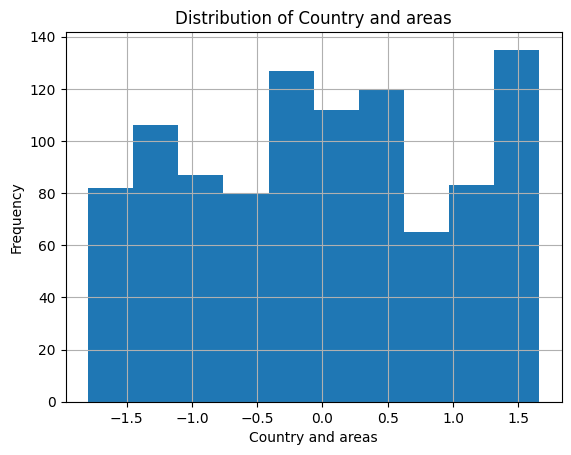

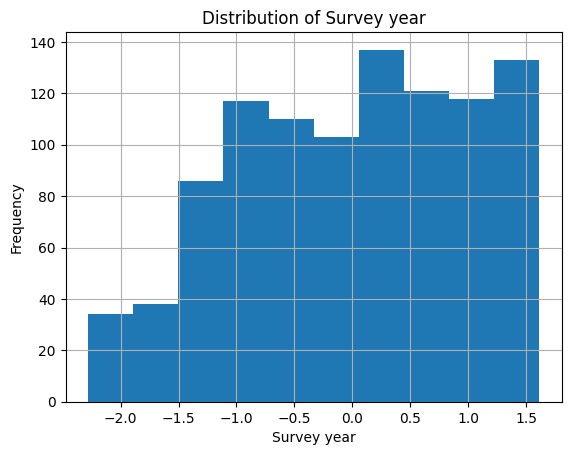

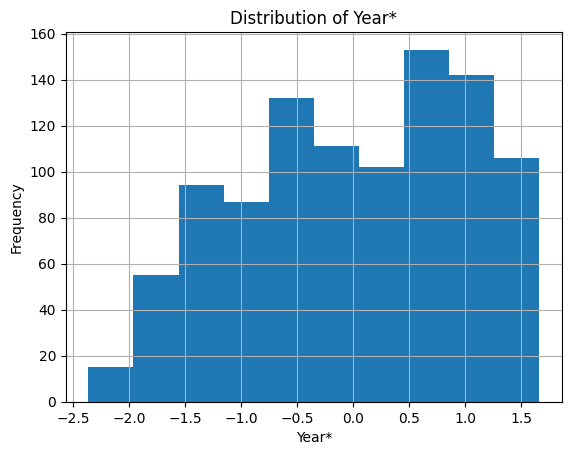

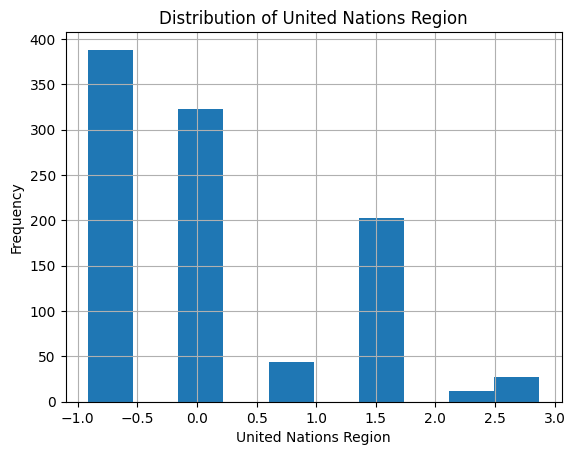

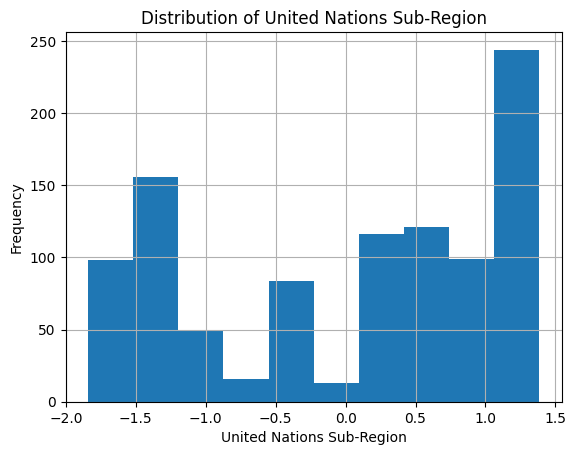

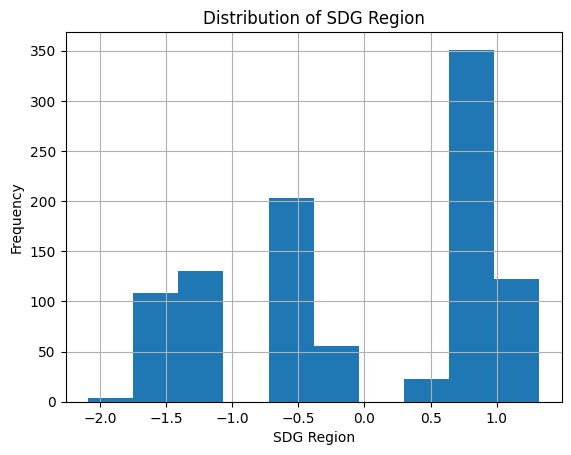

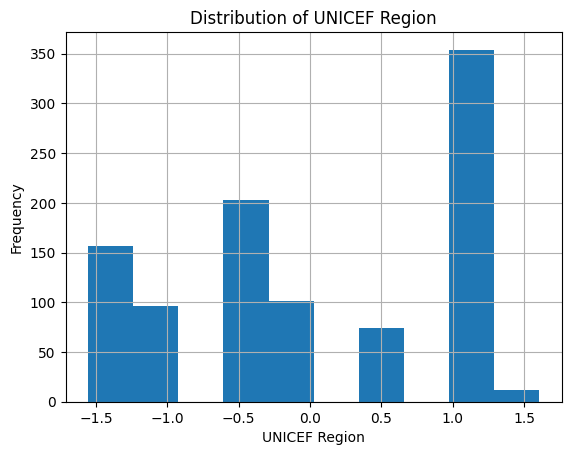

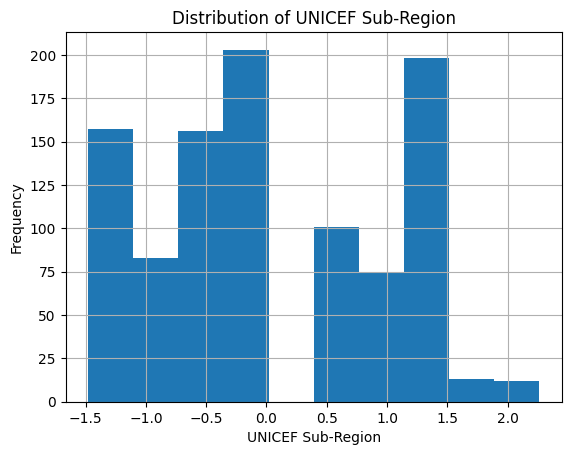

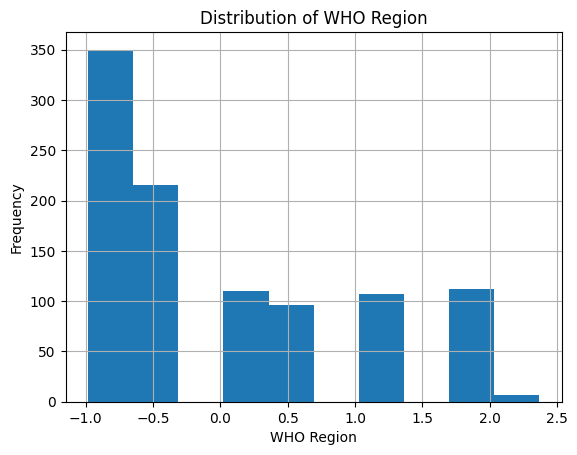

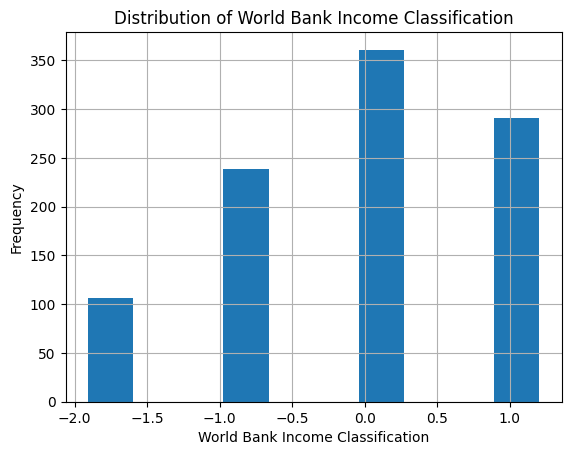

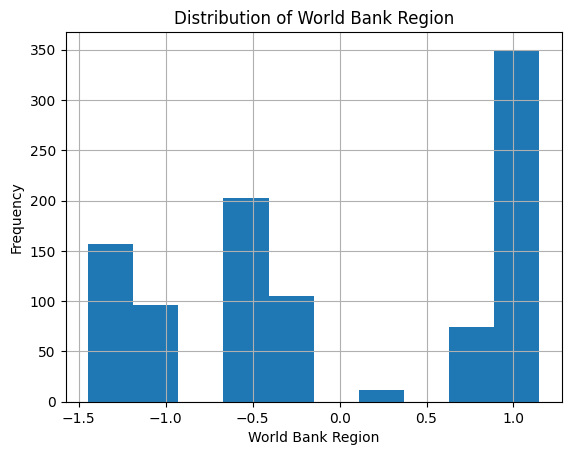

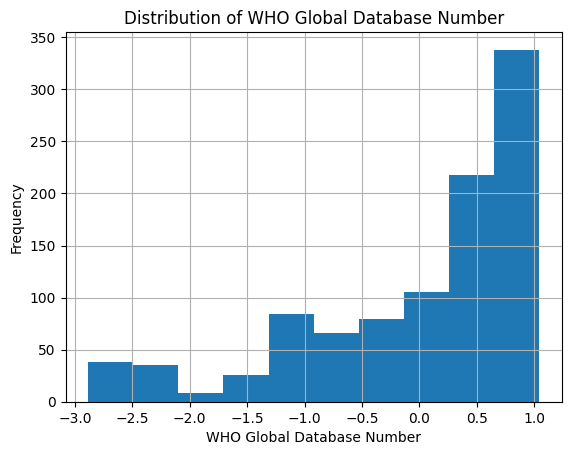

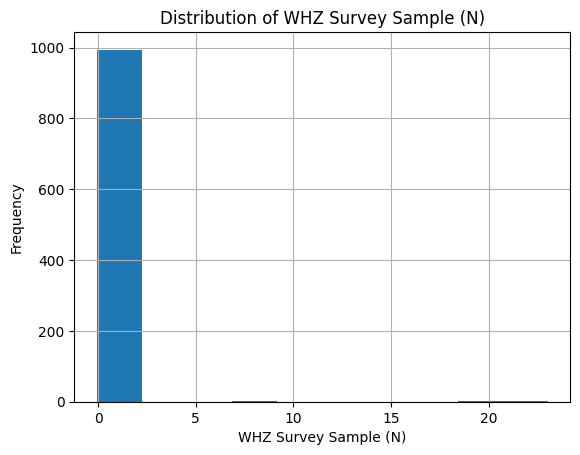

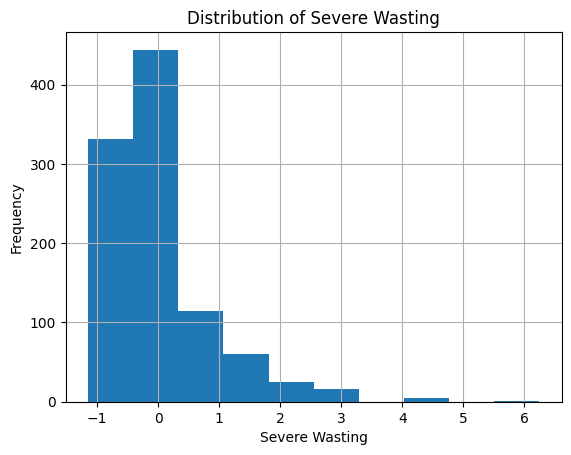

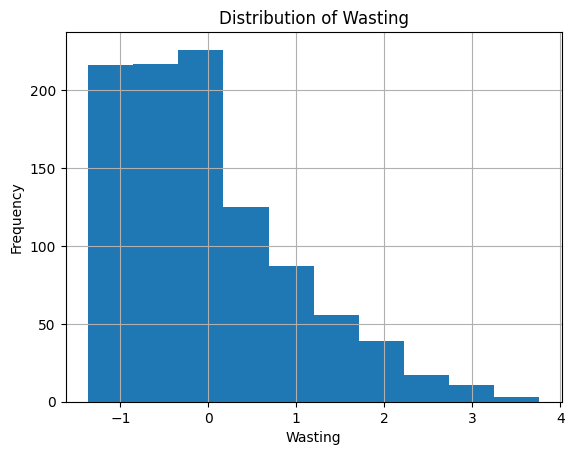

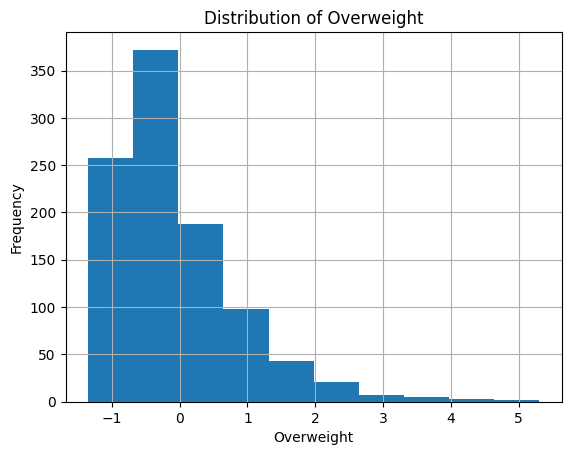

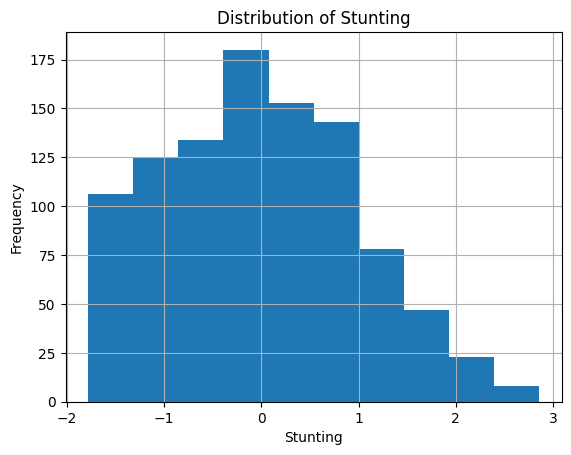

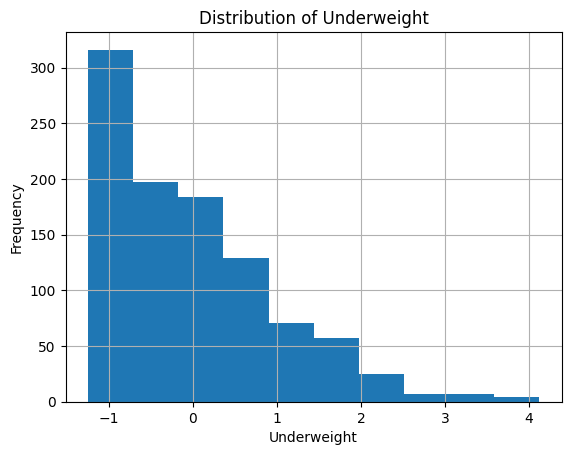

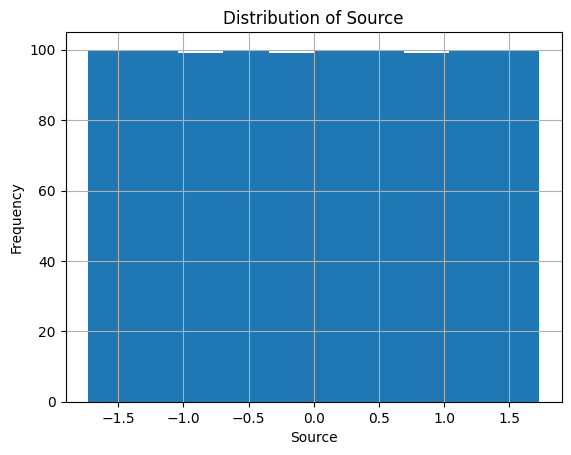

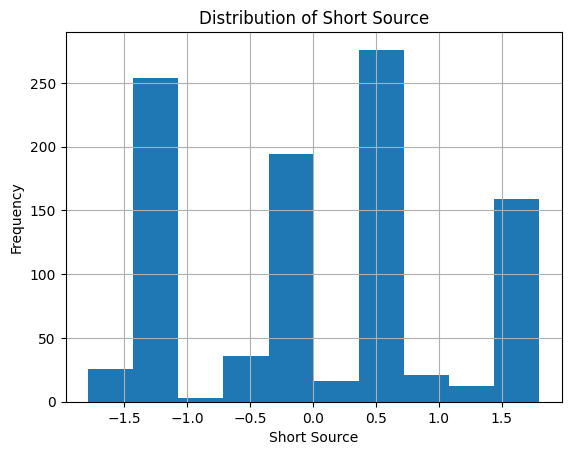

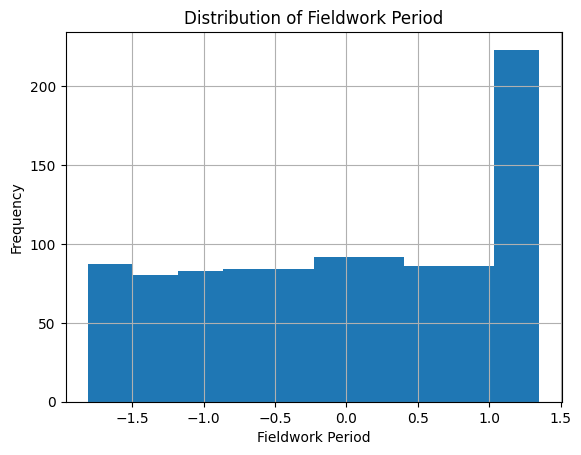

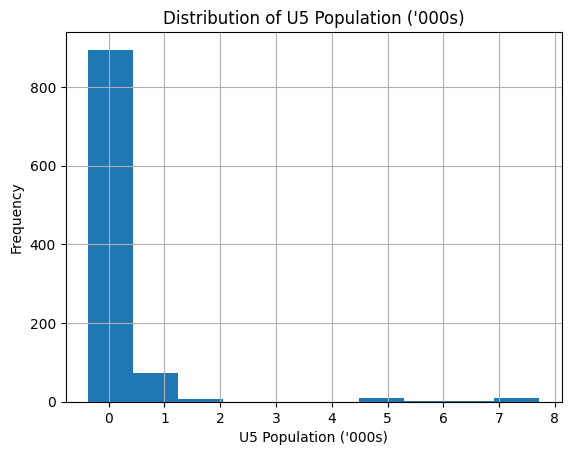

In [ ]:
#Histogram Plot
for col in Survey_df.columns:
    Survey_df[col].hist(bins=10)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

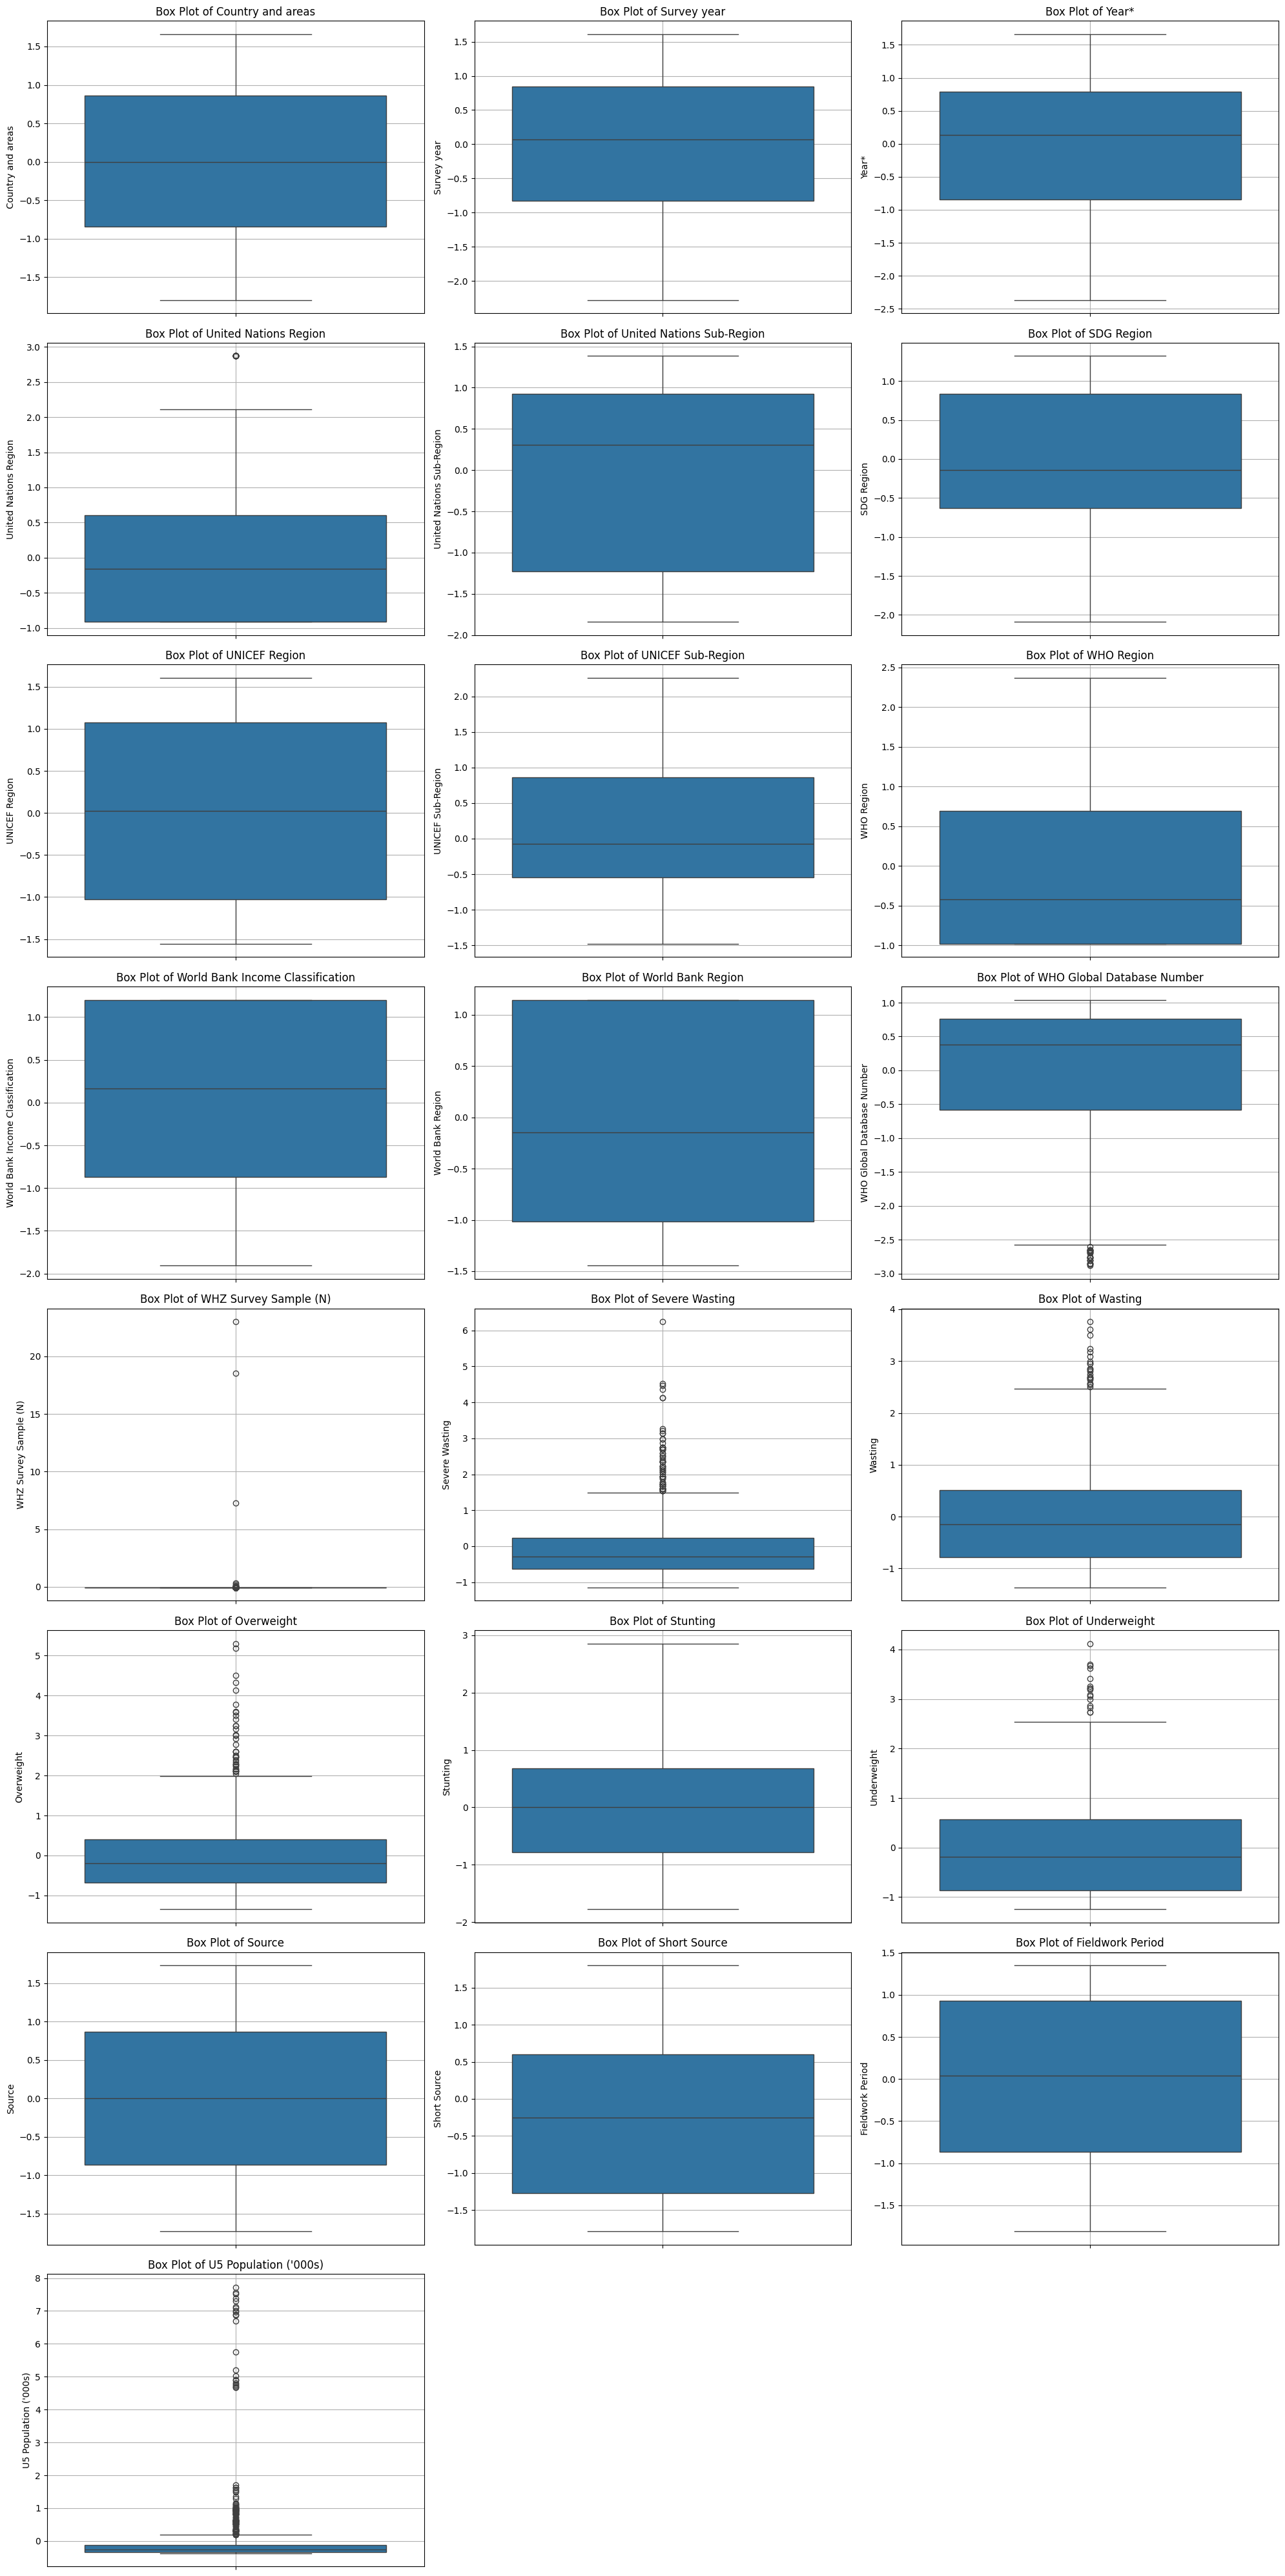

In [ ]:
#Box Plot
numeric_cols = Survey_df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(y=Survey_df[col], ax=axes[idx])
    axes[idx].set_title(f'Box Plot of {col}')
    axes[idx].set_xlabel('')
    axes[idx].grid(True)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**-Get the Outliers using IQR**

In [ ]:
outliers = {}
for col in Survey_df.columns:
    Q1 = Survey_df[col].quantile(0.25)
    Q3 = Survey_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_rows = Survey_df[(Survey_df[col] < lower_bound) | (Survey_df[col] > upper_bound)]
    outliers[col] = len(outlier_rows)

# Show columns with outliers
for col, count in outliers.items():
        print(f'{col}: {count} outliers')


Country and areas: 0 outliers
Survey year: 0 outliers
Year*: 0 outliers
United Nations Region: 27 outliers
United Nations Sub-Region: 0 outliers
SDG Region: 0 outliers
UNICEF Region: 0 outliers
UNICEF Sub-Region: 0 outliers
WHO Region: 0 outliers
World Bank Income Classification: 0 outliers
World Bank Region: 0 outliers
WHO Global Database Number: 24 outliers
WHZ Survey Sample (N): 176 outliers
Severe Wasting: 67 outliers
Wasting: 23 outliers
Overweight: 37 outliers
Stunting: 0 outliers
Underweight: 16 outliers
Source: 0 outliers
Short Source: 0 outliers
Fieldwork Period: 0 outliers
U5 Population ('000s): 129 outliers


In [ ]:
#Function to handel the outler using IQR
def handle_outliers(df, column):
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [ ]:
#Apply the function on the used data
for col in Survey_df.columns:
    Survey_df = handle_outliers(Survey_df, col)

In [ ]:
# Display outliers after handling
outliers_after = {}
for col in Survey_df.columns:
    outlier_rows = Survey_df[(Survey_df[col] < lower_bound) | (Survey_df[col] > upper_bound)]
    outliers_after[col] = len(outlier_rows)

for col, count in outliers_after.items():
    print(f'{col}: {count} outliers')

Country and areas: 0 outliers
Survey year: 0 outliers
Year*: 0 outliers
United Nations Region: 0 outliers
United Nations Sub-Region: 0 outliers
SDG Region: 0 outliers
UNICEF Region: 0 outliers
UNICEF Sub-Region: 0 outliers
WHO Region: 0 outliers
World Bank Income Classification: 0 outliers
World Bank Region: 0 outliers
WHO Global Database Number: 0 outliers
WHZ Survey Sample (N): 0 outliers
Severe Wasting: 0 outliers
Wasting: 0 outliers
Overweight: 0 outliers
Stunting: 0 outliers
Underweight: 0 outliers
Source: 0 outliers
Short Source: 0 outliers
Fieldwork Period: 0 outliers
U5 Population ('000s): 0 outliers


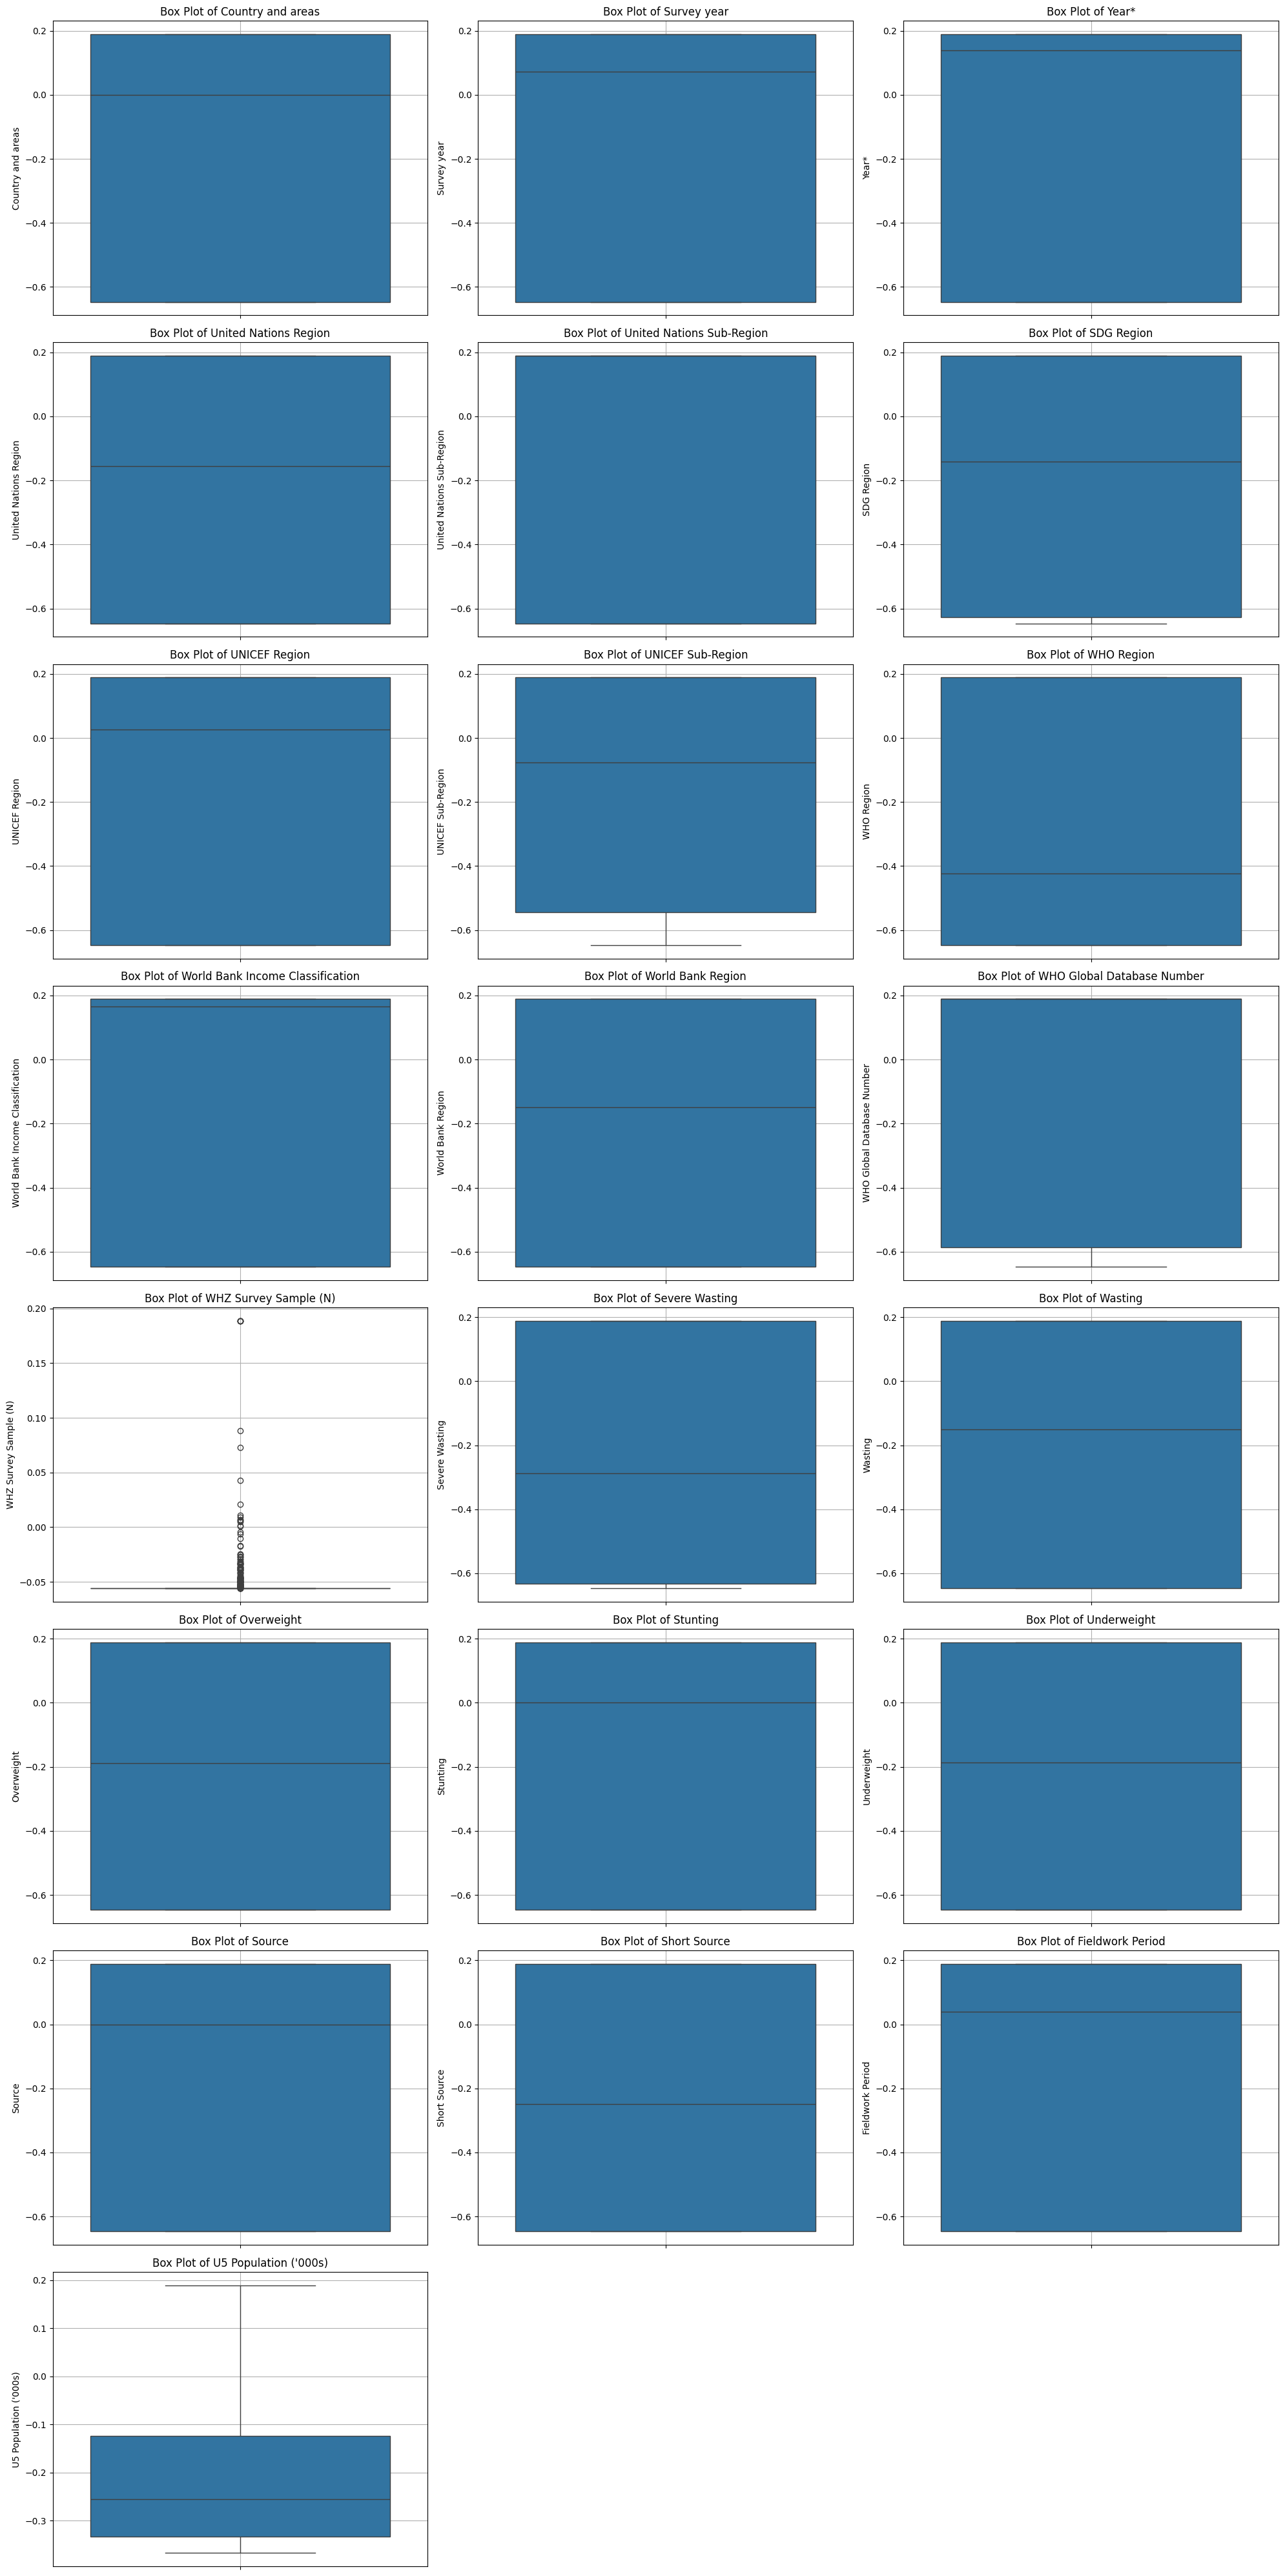

In [ ]:
#Box Plot after handel outliers
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(y=Survey_df[col], ax=axes[idx])
    axes[idx].set_title(f'Box Plot of {col}')
    axes[idx].set_xlabel('')
    axes[idx].grid(True)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

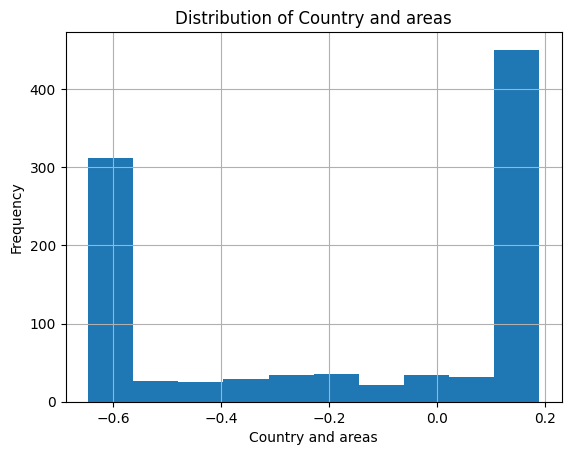

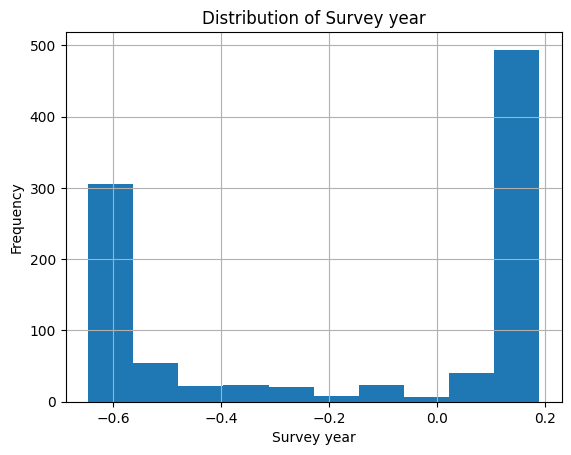

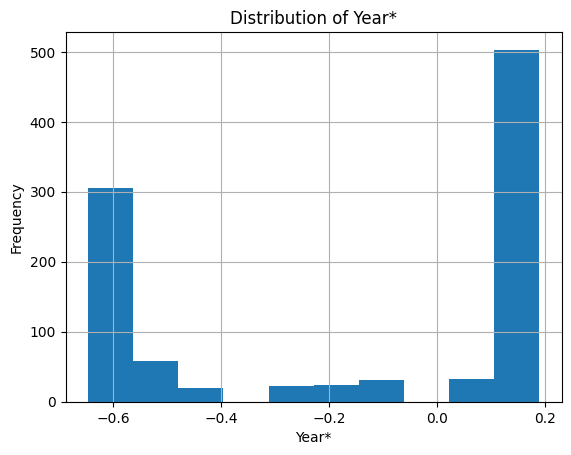

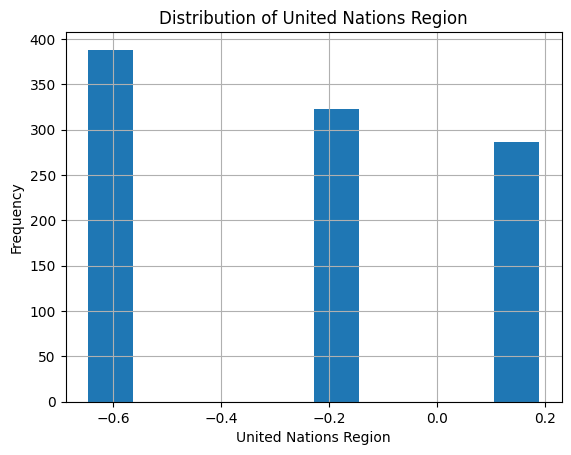

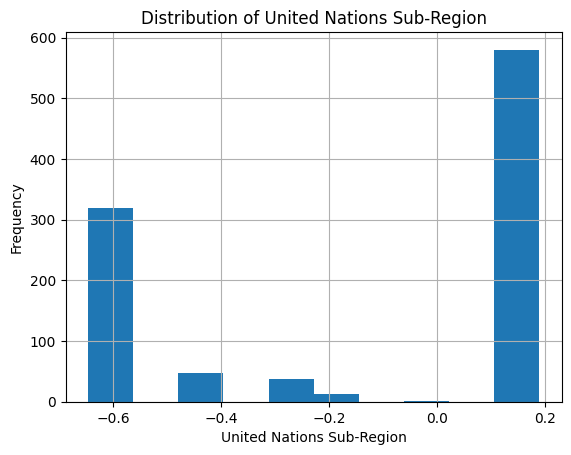

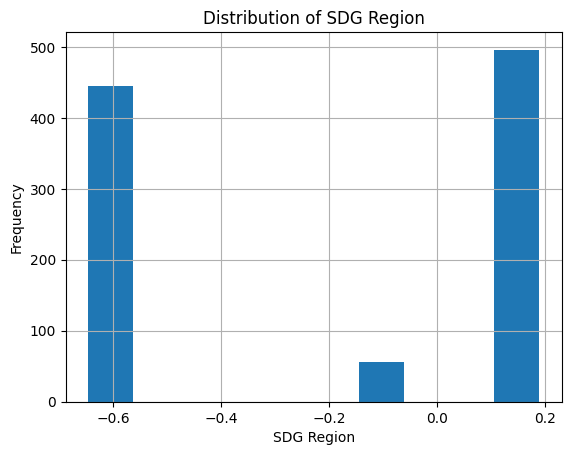

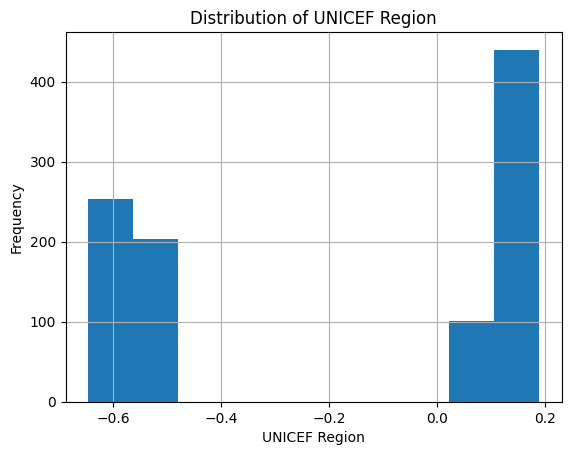

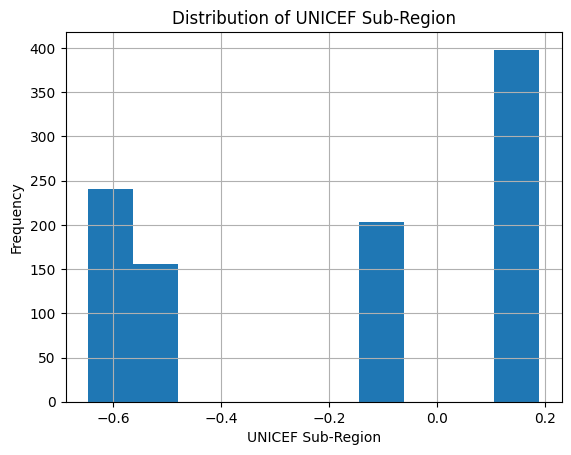

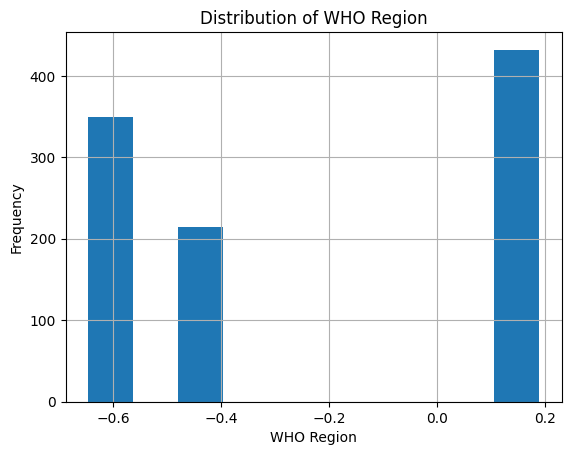

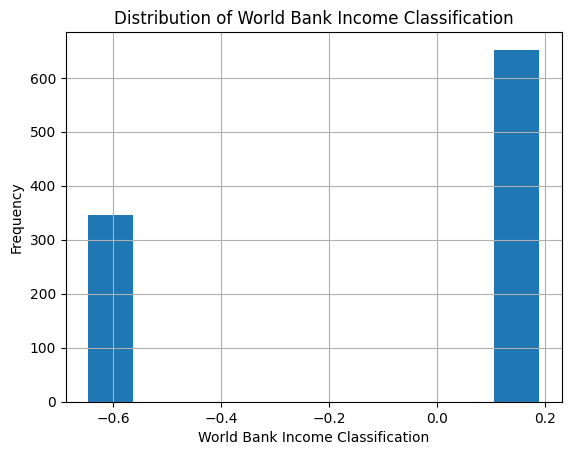

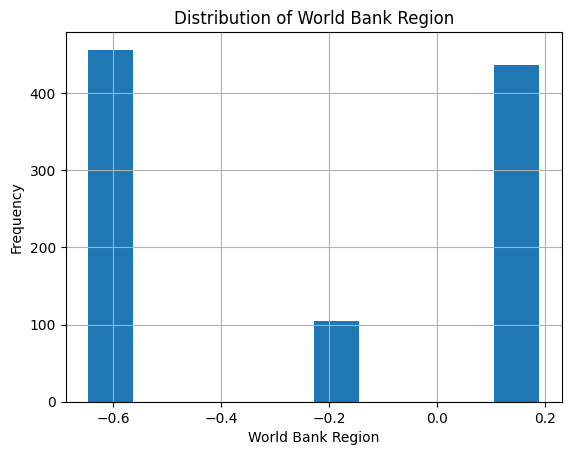

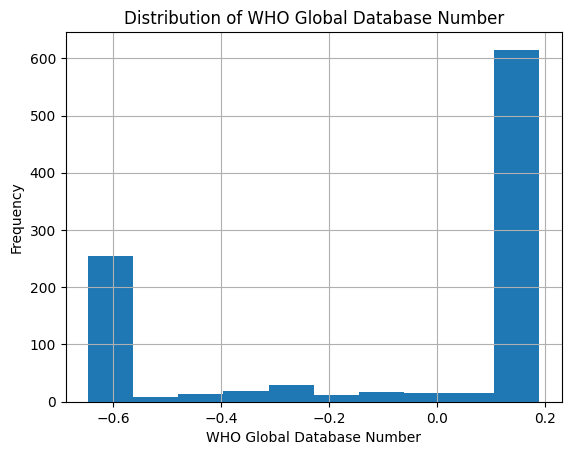

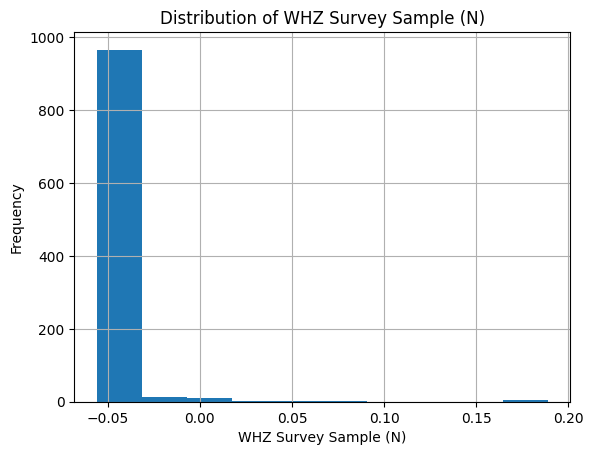

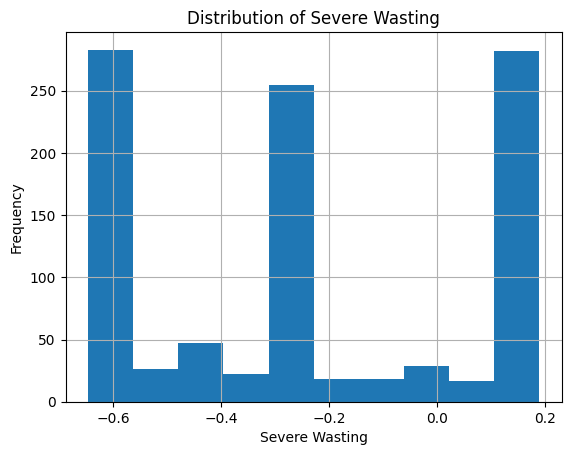

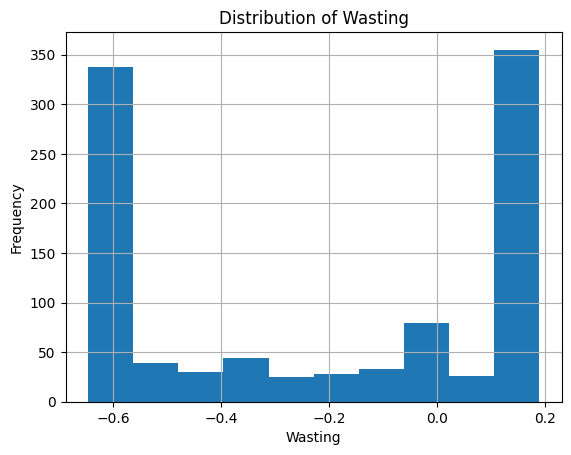

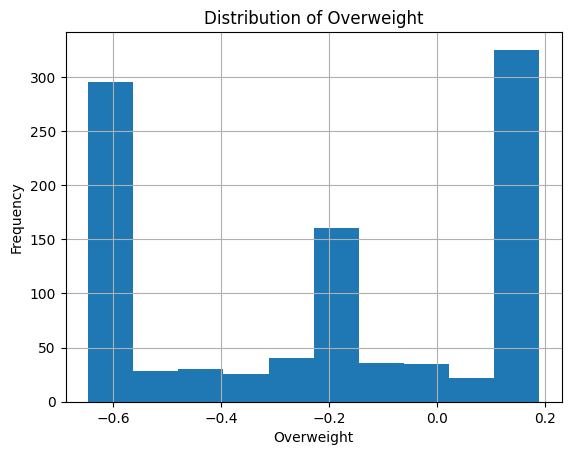

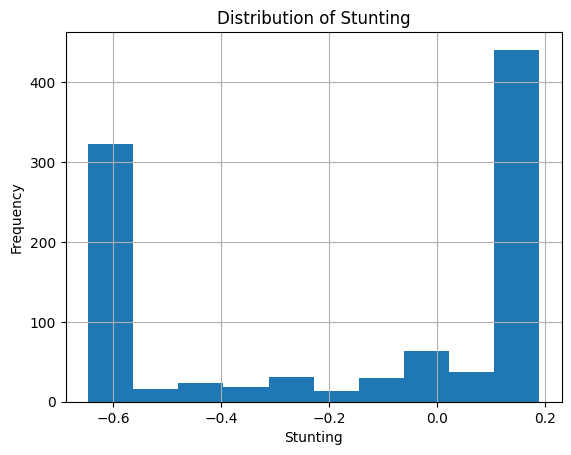

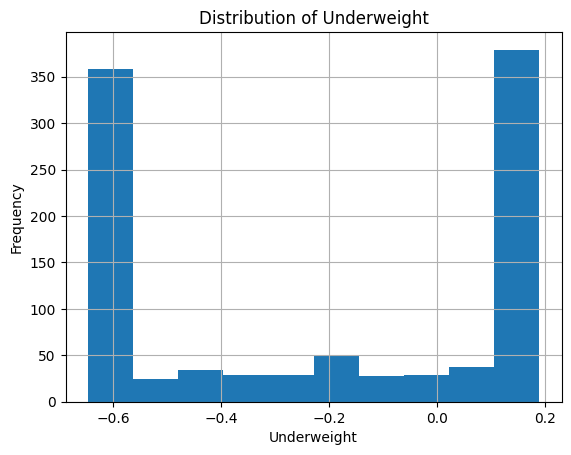

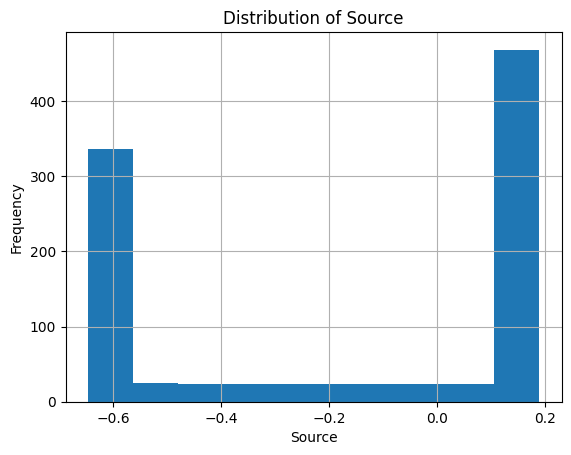

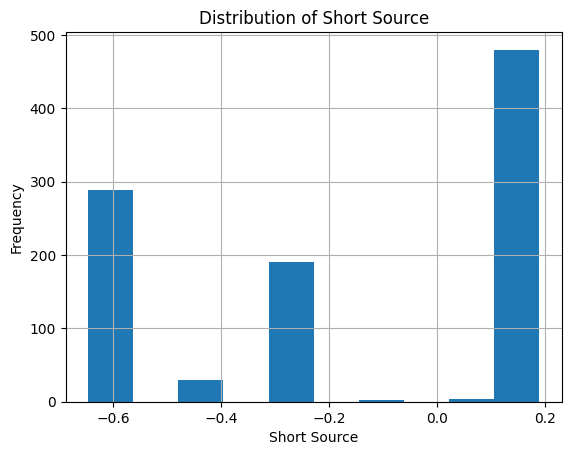

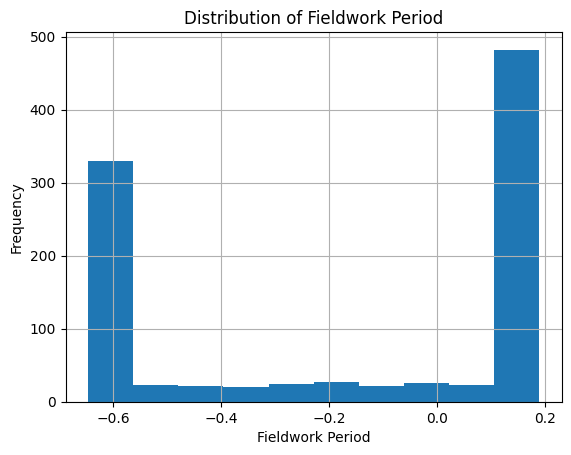

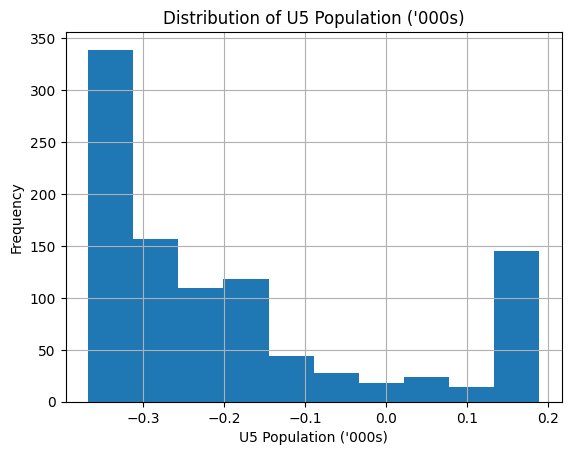

In [ ]:
#Histogram Plot after handel outliers
for col in Survey_df.columns:
    Survey_df[col].hist(bins=10)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

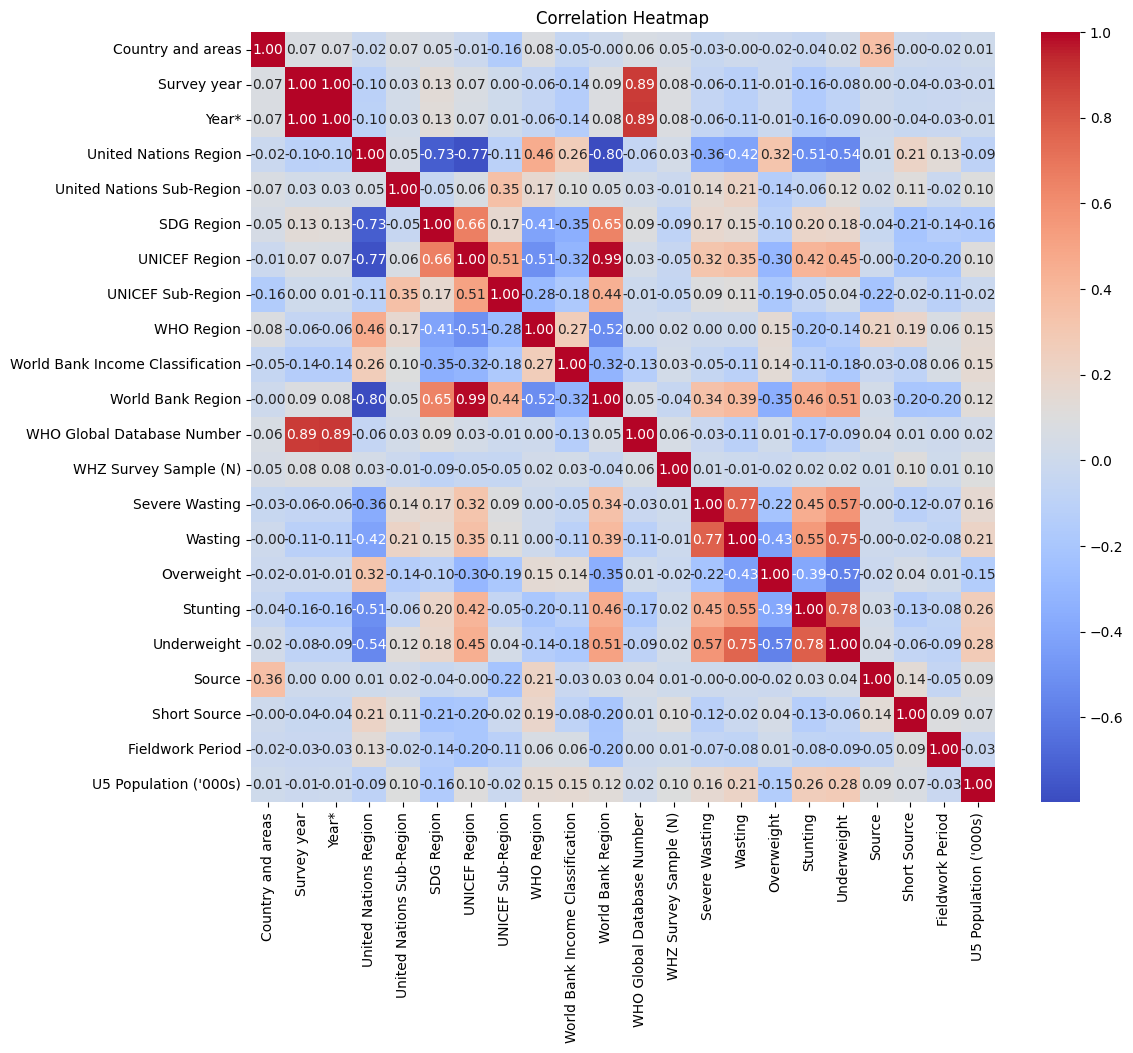

In [ ]:
#Heat Map
plt.figure(figsize=(12, 10))
sns.heatmap(Survey_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

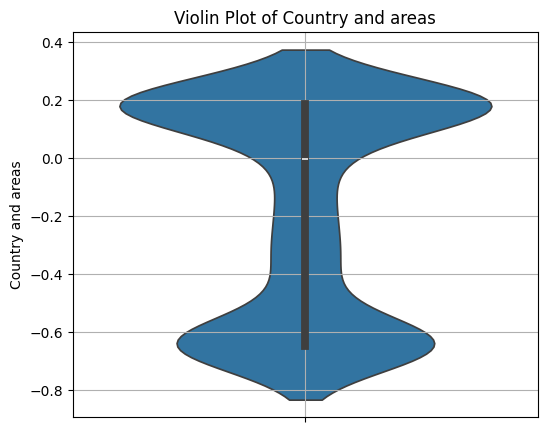

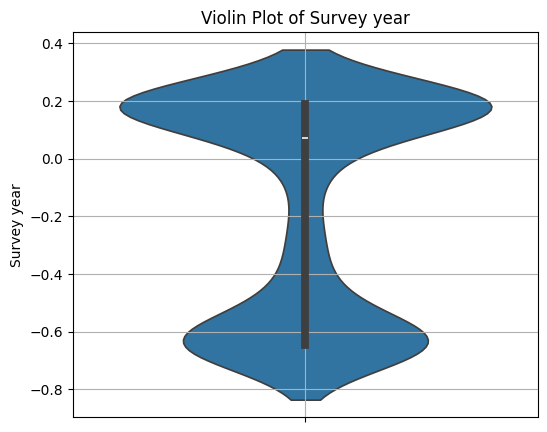

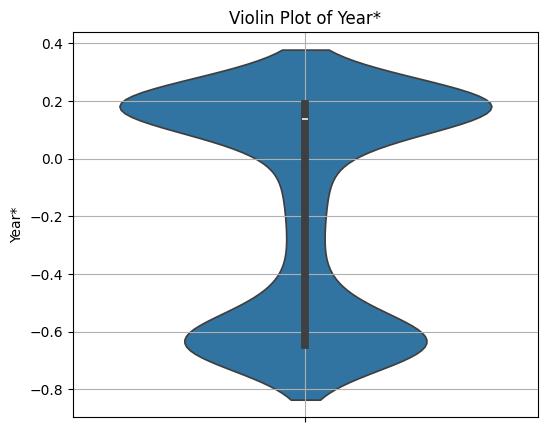

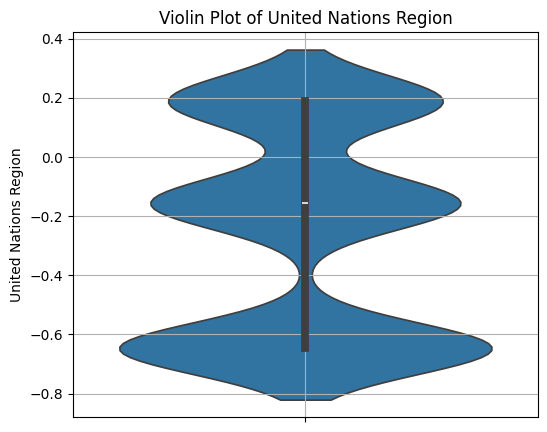

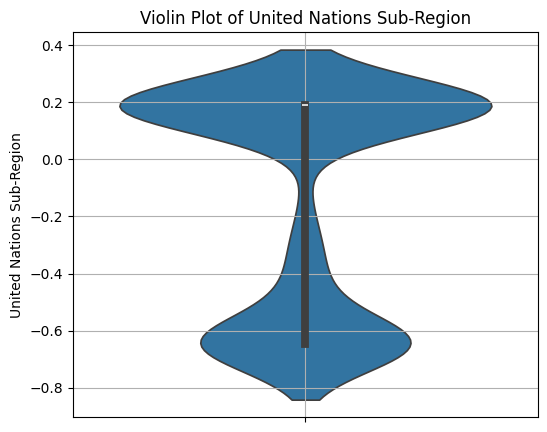

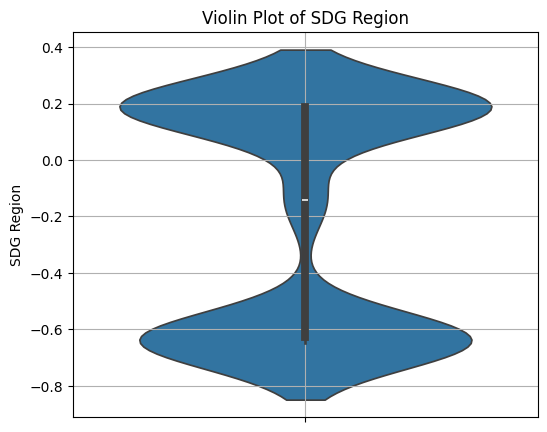

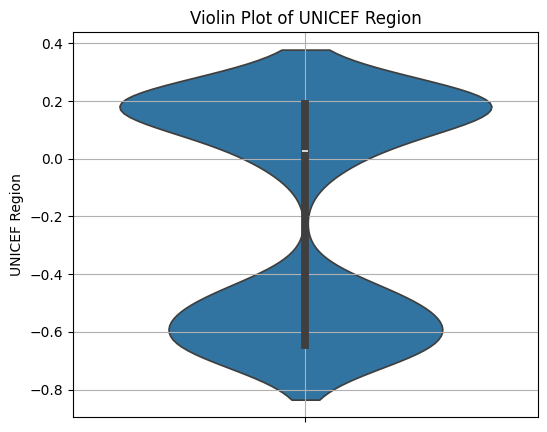

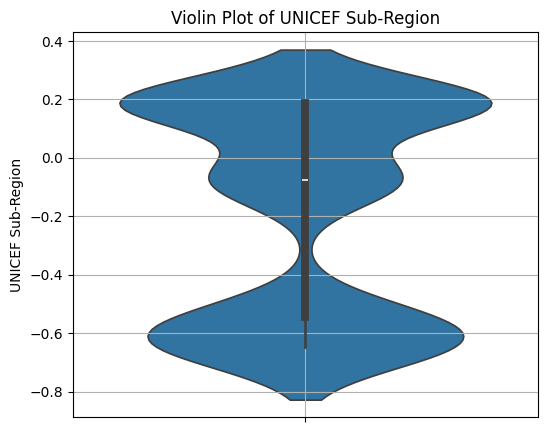

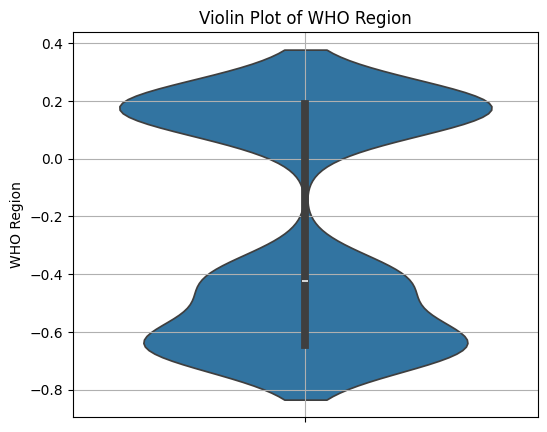

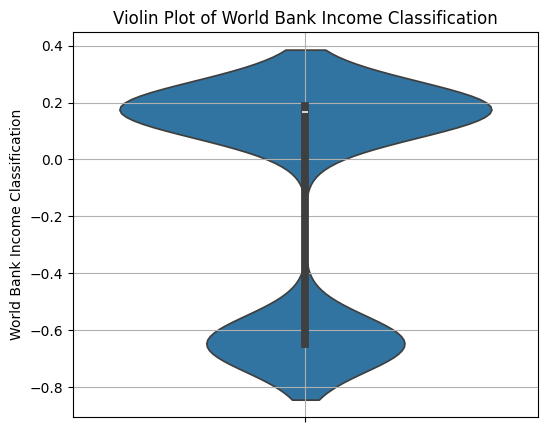

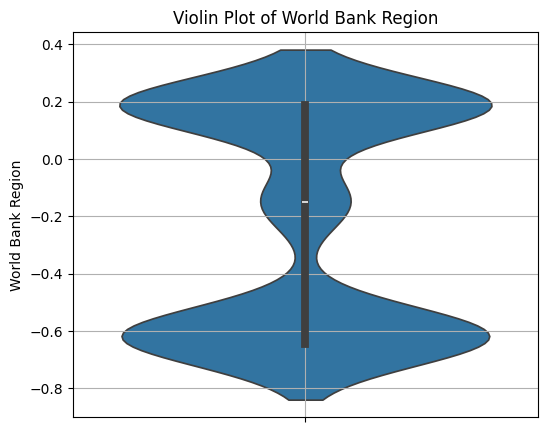

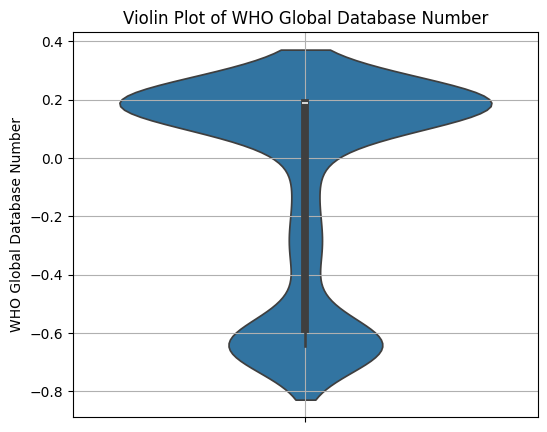

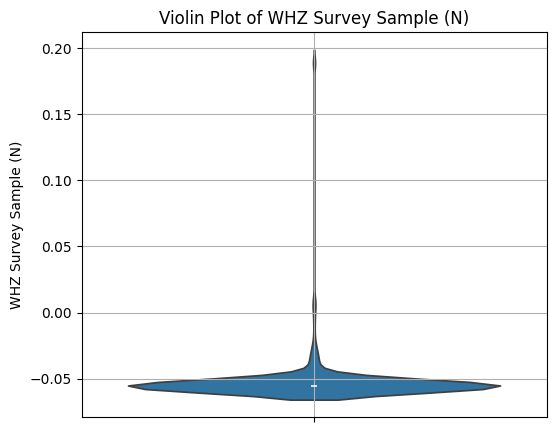

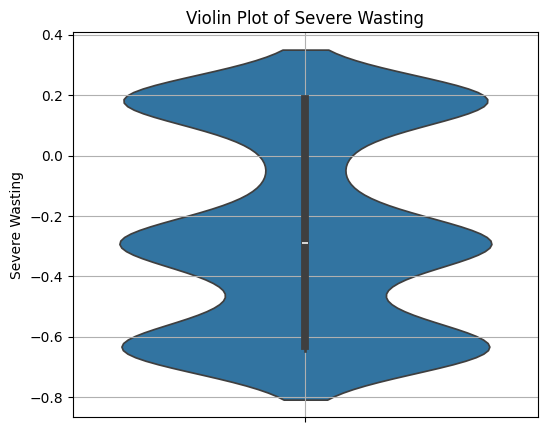

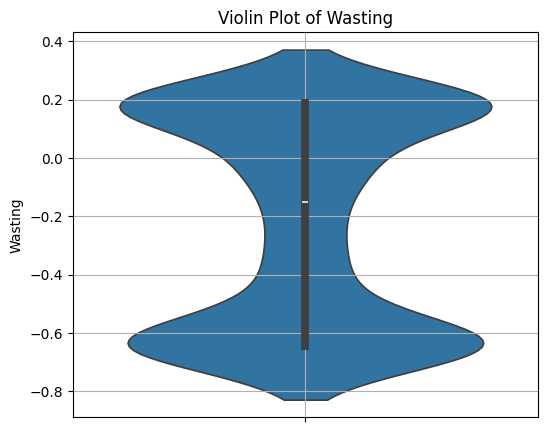

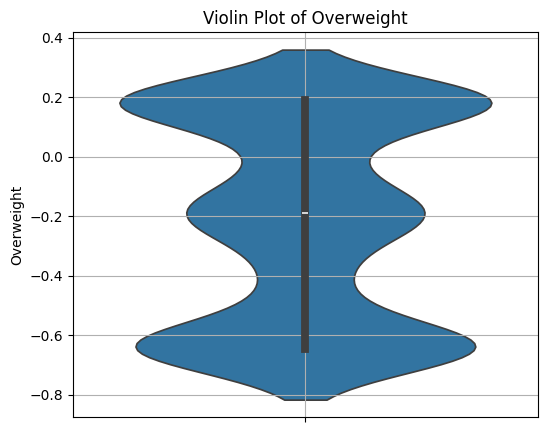

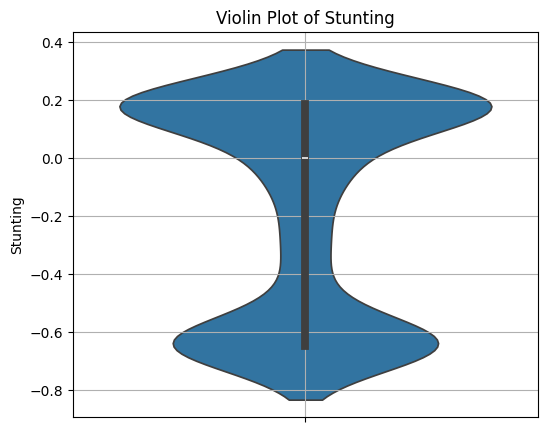

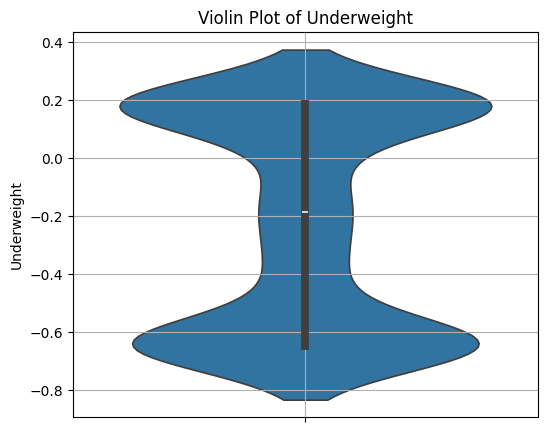

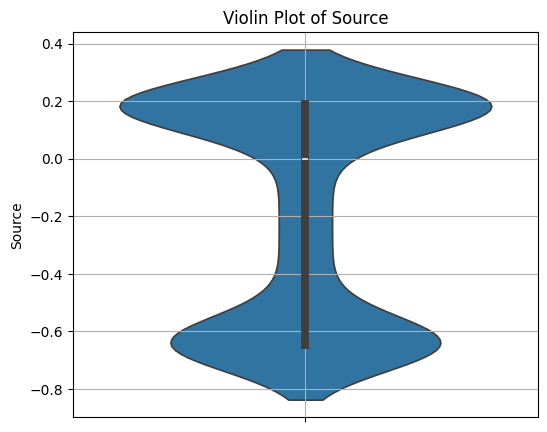

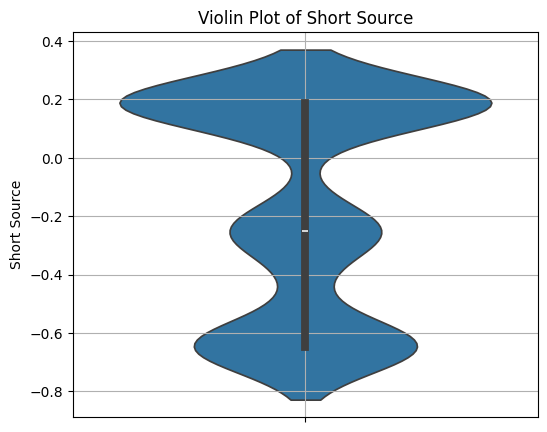

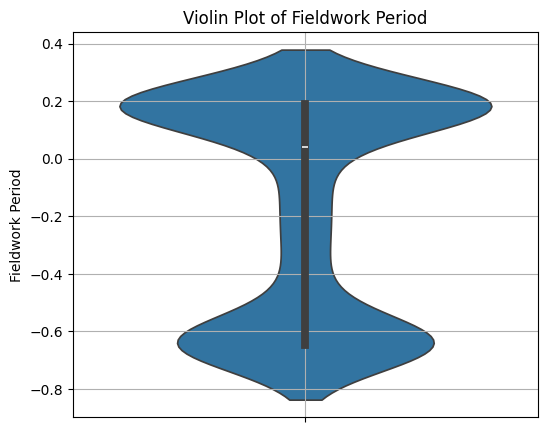

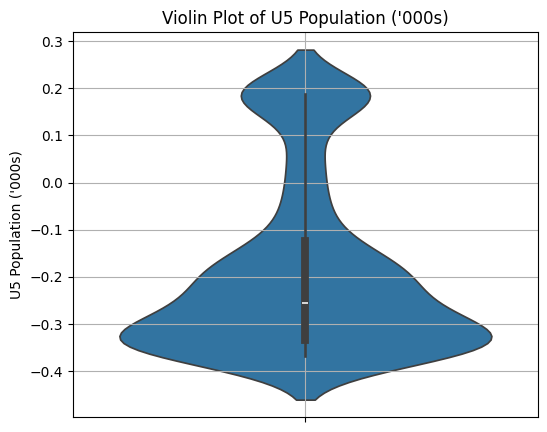

In [ ]:
for col in Survey_df.columns:
  plt.figure(figsize=(6, 5))
  sns.violinplot(y=Survey_df[col])
  plt.title(f'Violin Plot of {col}')
  plt.grid(True)
  plt.show()

# **Save the Cleaned Data**

In [ ]:
Survey_df.to_csv("Cleaned Survey Data.csv",index=False)

In [ ]:
cleaned_data = pd.read_csv('/content/Cleaned Survey Data.csv')
cleaned_data.head()

,Country and areas,Survey year,Year*,United Nations Region,United Nations Sub-Region,SDG Region,UNICEF Region,UNICEF Sub-Region,WHO Region,World Bank Income Classification,...,WHZ Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Source,Short Source,Fieldwork Period,U5 Population ('000s)
0,-0.646529,-0.646529,-0.646529,-0.156338,0.188895,-0.646529,0.188895,0.188895,0.134910,-0.646529,...,-0.055857,-0.288422,0.188895,0.087754,0.188895,0.188895,-0.646529,-0.249044,-0.646529,-0.134644
1,-0.646529,-0.062787,-0.079941,-0.156338,0.188895,-0.646529,0.188895,0.188895,0.134910,-0.646529,...,-0.055881,0.188895,0.188895,-0.331965,0.188895,0.188895,0.188895,0.188895,0.188895,-0.076843
2,-0.646529,0.188895,0.188895,-0.156338,0.188895,-0.646529,0.188895,0.188895,0.134910,-0.646529,...,-0.029237,0.188895,0.188895,-0.177332,0.188895,0.188895,-0.646529,0.188895,0.188895,-0.036998
3,-0.646529,0.188895,0.188895,-0.156338,0.188895,-0.646529,0.188895,0.188895,0.134910,-0.646529,...,-0.055769,-0.231118,-0.333195,-0.442417,0.188895,0.188895,-0.646529,0.188895,0.133345,-0.027458
4,-0.646529,-0.646529,-0.646529,-0.646529,-0.458639,0.188895,0.188895,-0.543468,-0.646529,0.166312,...,-0.055877,-0.116509,0.188895,-0.646529,0.188895,0.188895,-0.277962,-0.249044,-0.646529,-0.200877
